<a href="https://colab.research.google.com/github/FelipeMontLopes/Data_Science_Portfolio/blob/main/An%C3%A1lise_Quantitativa_Cripto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise Quantitativa
 - Autor Felipe Lopes


## Criando um modelo quantitativo através de análises, testes e backtestes.




In [40]:
#pip install yfinance

In [41]:
import pandas as pd
import numpy as np
from datetime import datetime
import yfinance as yf
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import seaborn as sns

In [42]:
# Criando a base de dados

ticker = "BTC-USD"
star = "2015-01-01"
end = datetime.today().strftime("%Y-%m-%d")
df1 = yf.download(ticker, star, end)


# Construição dos alvos

df1["Retorno"] = df1["Adj Close"].pct_change(1)*100

df1

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Retorno
Date,,,,,,,
2015-01-01,320.434998,320.434998,314.002991,314.248993,314.248993,8036550,NaN
2015-01-02,314.079010,315.838989,313.565002,315.032013,315.032013,7860650,0.249172
2015-01-03,314.846008,315.149994,281.082001,281.082001,281.082001,33054400,-10.776686
2015-01-04,281.145996,287.230011,257.612000,264.195007,264.195007,55629100,-6.007853
2015-01-05,265.084015,278.341003,265.084015,274.473999,274.473999,43962800,3.890684
...,...,...,...,...,...,...,...
2023-02-05,23332.248047,23423.435547,22841.759766,22955.666016,22955.666016,19564262605,-1.612310
2023-02-06,22954.021484,23119.279297,22692.025391,22760.109375,22760.109375,23825006542,-0.851888
2023-02-07,22757.267578,23310.974609,22756.257812,23264.291016,23264.291016,27187964471,2.215199


In [95]:
# Gráfico de Visualização
fig = make_subplots(rows = 1, cols = 1,
                    shared_xaxes = True,
                    vertical_spacing = 0.08)

fig.add_trace(go.Scatter(x = df1.index, y = df1["Adj Close"]
                         , name = ticker, line = dict(color = "blue"))
              , row = 1, col = 1)

fig.update_layout(height = 900, width = 1200
                  , title_text = "Gráfico histórico " + ticker
                  , font_color = "blue"
                  , title_font_color = "black"
                  , yaxis_title = "Year"
                  , legend_title = "Study objects"
                  , font = dict(size = 15, color = "Black")
                 )

fig.update_layout(
    xaxis = dict(
        rangeselector = dict(
            buttons = [
                dict(count = 4,
                     label = "4m",
                     step = "month",
                     stepmode = "backward"),
                dict(count = 6,
                     label = "6m",
                     step = "month",
                     stepmode = "backward"),
                dict(count = 1,
                     label = "1y",
                     step = "year",
                     stepmode = "backward"),
                dict(step = "all")
            ]),
        type = "date")
    , yaxis = dict(autorange = True, fixedrange = False)
    )
fig.update_layout(hovermode = "x")

fig.show()

In [44]:
# Análisando as estatísticas dos retornos - Base total

df1["Retorno"].describe()

count    2961.000000
mean        0.217531
std         3.833386
min       -37.169539
25%        -1.283279
50%         0.183710
75%         1.774026
max        25.247169
Name: Retorno, dtype: float64

In [45]:
# Análisando as estatísticas dos retornos - por ano

df1.groupby(df1.index.year)["Retorno"].describe()

,count,mean,std,min,25%,50%,75%,max
Date,,,,,,,,
2015,364.0,0.153039,3.604090,-21.144862,-1.100146,0.125165,1.714028,17.821709
2016,366.0,0.252074,2.513573,-15.332114,-0.543461,0.184162,0.975956,11.949375
2017,365.0,0.861234,4.991916,-18.741101,-1.377587,0.888678,3.270437,25.247169
2018,365.0,-0.272919,4.243062,-16.854801,-2.367961,0.078587,1.587465,13.215957
2019,365.0,0.241734,3.562373,-14.085681,-1.260459,0.120633,1.528412,17.356014
2020,366.0,0.458186,3.770822,-37.169539,-0.938662,0.266779,1.769725,18.187756
2021,365.0,0.216458,4.209012,-13.766123,-2.181570,0.134848,2.523476,18.746474
2022,365.0,-0.225691,3.325879,-15.974726,-1.568110,-0.164629,1.314448,14.541184
2023,40.0,0.721231,2.391763,-4.883996,-0.389846,0.413504,1.570144,7.539125


In [97]:
# Construindo a Distribuição dos Retornos

import plotly.express as px

fig = make_subplots(rows = 1, cols = 1,
                    shared_xaxes = True,
                    vertical_spacing = 0.08)

fig = px.histogram(df1["Retorno"])

fig.update_layout(height = 500, width = 1000
                  , title_text = "Distribuição dos Retornos - " + ticker 
                  , font_color = "blue"
                  , title_font_color = "black"
                  , xaxis_title = "Retornos"
                  , yaxis_title = "Frequência"               
                  , font = dict(size = 15, color = "Black")
                 )
fig.update_layout(hovermode = "x")



fig.show()

In [98]:
plt.style.use("fivethirtyeight")
# https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html

#Price Action e Análise de dados

"Teoria de Down: Os preços descontam tudo!"


Análisar os valores relativos do candle, podemos ter alguns momentos onde, o comportamento do mercado eventualmente pode sinalizar alguma coisa. 






In [99]:
# Construção dos Alvos

# Alvo 1 - Retorno
df1["Alvo1"] = df1["Retorno"].shift(-1)

# Alvo 5 - Retorno
df1["Retorno5"] = df1["Adj Close"].pct_change(5)*100
df1["Alvo5"] = df1["Retorno5"].shift(-5)

# Alvo 10 - Retorno
df1["Retorno10"] = df1["Adj Close"].pct_change(10)*100
df1["Alvo10"] = df1["Retorno10"].shift(-10)

# Criacao dos alvos categoricos 
df1["Alvo1_cat"] = np.where(df1["Alvo1"] > 0 , 1, 0)
df1["Alvo5_cat"] = np.where(df1["Alvo5"] > 0 , 1, 0)
df1["Alvo10_cat"] = np.where(df1["Alvo10"] > 0 , 1, 0)

Aqui queremos análisar apenas o "rastro" do movimento dos preços no dia.


In [100]:
# Cria os pavios (wicks)

# Pavio superior 
df1["Wick_upper"] = np.where(df1["Retorno"] > 0
                             , (df1["High"]/df1["Adj Close"]-1)*100        #Para dias de alta
                             , (df1["High"]/df1["Open"]-1)*100)            #Para dias de baixa
# Pavio inferior
df1["Wick_lower"] = np.where(df1["Retorno"] > 0
                             , (df1["Open"]/df1["Low"]-1)*100              #Para dias de alta 
                             , (df1["Adj Close"]/df1["Low"]-1)*100)        #Para dias de baixa

# Direção do dia atual
df1["Dir_D"] = np.where(df1["Retorno"] > 0, "Alta", "Baixa")

In [101]:
# Visualizando as estatísticas dos Wicks

df1[["Wick_upper", "Wick_lower"]].describe()

,Wick_upper,Wick_lower
count,2962.000000,2962.000000
mean,0.943275,1.192682
std,1.288435,1.734453
min,0.000000,0.000000
25%,0.213120,0.252347
50%,0.533410,0.668533
75%,1.186440,1.425350
max,20.409761,22.178094


Conclsões iniciais:
 - Na média, as variações até a máxima tem uma média de 0.9432% e até a mínima de 1.1926%. Portanto há um comportamento mais agressivo para movimentos de baixa. 

 - O desvio padrão dos móvimentos de baixa também são mais agressivos do que os movimentos de alta.

 

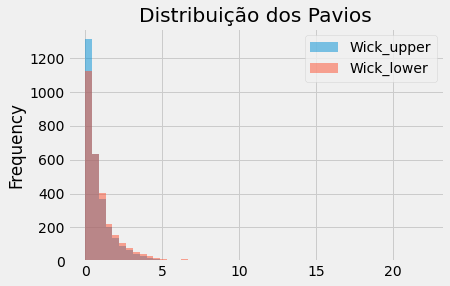

In [102]:
# Visualizando a distribuiçao dos Wicks

df1[["Wick_upper", "Wick_lower"]].plot.hist(bins = 50
                            , alpha = 0.5
                            , title = "Distribuição dos Pavios");

In [103]:
# Qual é a média do tamanho dos pavios nos dias de alta ou baixa

pd.pivot_table(df1, index = "Dir_D"
               , aggfunc = {"Wick_upper" : np.mean
                            , "Wick_lower": np.mean})

,Wick_lower,Wick_upper
Dir_D,,
Alta,0.992498,0.959993
Baixa,1.423730,0.923979


Para o Bitcoin, contra intúitivamente, para os dias de alta, a vaicão média das sombras de baixa é maior que as sombras de alta.

Para os dias de baixa, segue um padrão mais lógico, os dias de baixa possuem variações maiores nas sombras inferiores.

In [104]:
# Qual é a média dos retornos dos dias sucessivos

pd.pivot_table(df1, index = "Dir_D"
               , aggfunc = {"Alvo1" : np.mean
                            , "Alvo5": np.mean
                            , "Alvo10": np.mean})

,Alvo1,Alvo10,Alvo5
Dir_D,,,
Alta,0.218447,2.679267,1.287816
Baixa,0.216472,1.812304,0.906404


In [105]:
# Não diz muito. Vamos ver agora em relação aos pavios
# Mas antes, vamos dividir os pavios em intervalos

pd.qcut(df1["Wick_upper"], 3)

Date
2015-01-01    (-0.001, 0.308]
2015-01-02    (-0.001, 0.308]
2015-01-03    (-0.001, 0.308]
2015-01-04     (0.912, 20.41]
2015-01-05     (0.912, 20.41]
                   ...       
2023-02-05     (0.308, 0.912]
2023-02-06     (0.308, 0.912]
2023-02-07    (-0.001, 0.308]
2023-02-08     (0.308, 0.912]
2023-02-09    (-0.001, 0.308]
Name: Wick_upper, Length: 2962, dtype: category
Categories (3, interval[float64, right]): [(-0.001, 0.308] < (0.308, 0.912] < (0.912, 20.41]]

In [106]:
pd.qcut(df1["Wick_upper"], 3, labels = ["Baixo", "Médio", "Alto"])

Date
2015-01-01    Baixo
2015-01-02    Baixo
2015-01-03    Baixo
2015-01-04     Alto
2015-01-05     Alto
              ...  
2023-02-05    Médio
2023-02-06    Médio
2023-02-07    Baixo
2023-02-08    Médio
2023-02-09    Baixo
Name: Wick_upper, Length: 2962, dtype: category
Categories (3, object): ['Baixo' < 'Médio' < 'Alto']

In [107]:
# Atribuímos os intervalos ao nosso dataframe

df1["Wick_upper_cat"] = pd.qcut(df1["Wick_upper"], 3, labels = ["Baixo", "Médio", "Alto"])
df1["Wick_lower_cat"] = pd.qcut(df1["Wick_lower"], 3, labels = ["Baixo", "Médio", "Alto"])

In [108]:

# Agora temos algo mais significativo

# Intervalos dos pavios de alta
pd.pivot_table(df1, index = "Wick_upper_cat"
               , aggfunc = {"Alvo1" : [np.mean, np.sum]
                            , "Alvo5": [np.mean, np.sum]
                            , "Alvo10": [np.mean, np.sum]})

Alvo1                Alvo10                  Alvo5  \
                    mean         sum      mean          sum      mean   
Wick_upper_cat                                                          
Baixo           0.254113  250.809089  2.842562  2799.923876  1.573783   
Médio           0.090498   89.321298  1.088608  1067.924546  0.420114   
Alto            0.307982  303.978121  2.895885  2855.342419  1.337401   

                             
                        sum  
Wick_upper_cat               
Baixo           1551.749588  
Médio            413.392275  
Alto            1320.014411

In [109]:
# Intervalos dos pavios de baixa
pd.pivot_table(df1, index = "Wick_lower_cat"
               , aggfunc = {"Alvo1" : [np.mean, np.sum]
                            , "Alvo5": [np.mean, np.sum]
                            , "Alvo10": [np.mean, np.sum]})


Alvo1                Alvo10                  Alvo5  \
                    mean         sum      mean          sum      mean   
Wick_lower_cat                                                          
Baixo           0.132746  131.020574  2.209382  2169.613345  1.013022   
Médio           0.293169  289.358276  2.034142  2001.595506  1.374542   
Alto            0.226676  223.729658  2.588217  2551.981990  0.945699   

                             
                        sum  
Wick_lower_cat               
Baixo            997.827131  
Médio           1353.923899  
Alto             933.405243

In [110]:

# Vamos inserir a direção do dia atual e ter uma visão mais completa

# Analisando o pavio de alta
pd.pivot_table(df1, index = ["Dir_D", "Wick_upper_cat"]
               , aggfunc = {"Alvo1" : [np.mean, np.sum]
                            , "Alvo5": [np.mean, np.sum]
                            , "Alvo10": [np.mean, np.sum]})

Alvo1                Alvo10                  Alvo5  \
                          mean         sum      mean          sum      mean   
Dir_D Wick_upper_cat                                                          
Alta  Baixo           0.473622  233.969049  4.012950  1974.371554  2.010128   
      Médio           0.233737  130.191481  1.443745   802.722460  0.733503   
      Alto           -0.032621  -17.484776  2.736688  1466.865003  1.199481   
Baixa Baixo           0.034158   16.840039  1.674548   825.552322  1.137437   
      Médio          -0.095047  -40.870183  0.624005   265.202087  0.011313   
      Alto            0.712778  321.462898  3.085505  1388.477416  1.501314   

                                  
                             sum  
Dir_D Wick_upper_cat              
Alta  Baixo           990.993023  
      Médio           408.561411  
      Alto            642.921613  
Baixa Baixo           560.756565  
      Médio             4.830864  
      Alto            677.092798

In [111]:
# Analisando o pavio de baixa

pd.pivot_table(df1, index = ["Dir_D","Wick_lower_cat"]
               , aggfunc = {"Alvo1" : [np.mean, np.sum]
                            , "Alvo5": [np.mean, np.sum]
                            , "Alvo10": [np.mean, np.sum]})

Alvo1                Alvo10                  Alvo5  \
                          mean         sum      mean          sum      mean   
Dir_D Wick_lower_cat                                                          
Alta  Baixo           0.214947  139.930523  3.109765  2018.237240  1.510773   
      Médio           0.334235  164.777993  2.804110  1382.426017  1.703210   
      Alto            0.094734   41.967237  1.907909   843.295760  0.498400   
Baixa Baixo          -0.026518   -8.909949  0.454583   151.376104  0.047238   
      Médio           0.252187  124.580283  1.261038   619.169489  1.045206   
      Alto            0.334122  181.762421  3.140967  1708.686231  1.309952   

                                  
                             sum  
Dir_D Wick_lower_cat              
Alta  Baixo           982.002344  
      Médio           839.682510  
      Alto            220.791192  
Baixa Baixo            15.824787  
      Médio           514.241390  
      Alto            712.614051

In [112]:
# Tem como ficar melhor ainda?
# Seguramente. Vamos adicionar uma lógica com uma média movel de 10 dias

df1["MM"] = df1["Adj Close"].rolling(window = 10).mean()
df1["MM_Ref"] = np.where(df1["Adj Close"] > df1["MM"]
                             , "Acima MM"
                             , "Abaixo MM")

pd.pivot_table(df1, index = ["MM_Ref", "Dir_D", "Wick_lower_cat"]
               , aggfunc = {"Alvo1" : [np.mean, np.sum]
                            , "Alvo5": [np.mean, np.sum]
                            , "Alvo10": [np.mean, np.sum]})

Alvo1                Alvo10               \
                                    mean         sum      mean          sum   
MM_Ref    Dir_D Wick_lower_cat                                                
Abaixo MM Alta  Baixo          -0.138909  -22.503337  0.911932   146.821017   
                Médio          -0.373972  -55.347850  1.384050   204.839408   
                Alto           -0.323111  -55.575047  0.755214   129.896796   
          Baixa Baixo          -0.071736  -15.351511 -0.459169   -97.803082   
                Médio           0.050101   14.930161  0.832695   246.477611   
                Alto            0.521678  171.110530  2.239751   734.638314   
Acima MM  Alta  Baixo           0.332176  162.433861  3.834869  1871.416224   
                Médio           0.638046  220.125843  3.413295  1177.586609   
                Alto            0.359935   97.542284  2.642218   713.398964   
          Baixa Baixo           0.052800    6.441562  2.076493   249.179187   
                Médio           0.559439  109.650121  1.911240   372.691878   
                Alto            0.049314   10.651891  4.509481   974.047917   

                                   Alvo5              
                                    mean         sum  
MM_Ref    Dir_D Wick_lower_cat                        
Abaixo MM Alta  Baixo           0.026473    4.262089  
                Médio           0.886593  131.215741  
                Alto            0.176928   30.431585  
          Baixa Baixo          -0.068883  -14.672142  
                Médio           0.755297  223.567955  
                Alto            0.953937  312.891233  
Acima MM  Alta  Baixo           1.999469  977.740256  
                Médio           2.053527  708.466769  
                Alto            0.702434  190.359607  
          Baixa Baixo           0.249975   30.496929  
                Médio           1.483028  290.673435  
                Alto            1.850569  399.722818

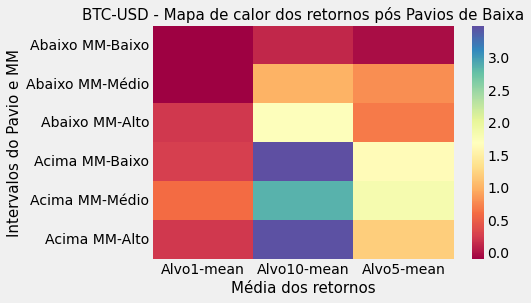

In [113]:
# Ok, agora é impossível ficar melhor?
# Não é. Tem como ficar ainda melhor sim: vamos visualizar!

analise_lower = pd.pivot_table(df1, index = ["MM_Ref", "Wick_lower_cat"]
                         , aggfunc = {"Alvo1" : [np.mean]
                                      , "Alvo5": [np.mean]
                                      , "Alvo10": [np.mean]})

analise_upper = pd.pivot_table(df1, index = ["MM_Ref", "Wick_upper_cat"]
                         , aggfunc = {"Alvo1" : [np.mean]
                                      , "Alvo5": [np.mean]
                                      , "Alvo10": [np.mean]})

sns.heatmap(analise_lower, cmap = "Spectral")
plt.title(ticker + " - Mapa de calor dos retornos pós Pavios de Baixa"
          , fontsize = 15)
plt.xlabel("Média dos retornos", fontsize = 15)
plt.ylabel("Intervalos do Pavio e MM", fontsize = 15);

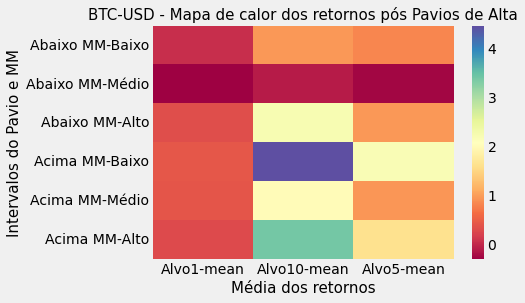

In [83]:
sns.heatmap(analise_upper, cmap = "Spectral")
plt.title(ticker + " - Mapa de calor dos retornos pós Pavios de Alta"
          , fontsize = 15)
plt.xlabel("Média dos retornos", fontsize = 15)
plt.ylabel("Intervalos do Pavio e MM", fontsize = 15);

# Análise do cruzamento das Médias Móveis

In [92]:
# Cria as médias móveis

p1 = 8
p2 = 80

ma1 = pd.DataFrame()
ma1["Media_curta"] = df1["Adj Close"].rolling(window = p1).mean()

ma2 = pd.DataFrame()
ma2["Media_longa"] = df1["Adj Close"].rolling(window = p2).mean()

In [94]:
# Vizualiza todos os dados




# Gráfico de Visualização
fig = make_subplots(rows = 1, cols = 1,
                    shared_xaxes = True,
                    vertical_spacing = 0.08)

fig.add_trace(go.Scatter(x = df1.index, y = df1["Adj Close"]
                         , name = ticker, line = dict(color = "blue"))
              , row = 1, col = 1)

fig.add_trace(go.Scatter(x = df1.index, y = ma1["Media_curta"]
                         , name = "Media_longa", line = dict(color = "red"))
              , row = 1, col = 1)

fig.add_trace(go.Scatter(x = df1.index, y = ma2["Media_longa"]
                         , name = "Media_longa", line = dict(color = "orange"))
              , row = 1, col = 1)

fig.update_layout(height = 900, width = 1200
                  , title_text = "Gráfico histórico " + ticker
                  , font_color = "blue"
                  , title_font_color = "black"
                  , yaxis_title = "Year"
                  , legend_title = "Study objects"
                  , font = dict(size = 15, color = "Black")
                 )

fig.update_layout(
    xaxis = dict(
        rangeselector = dict(
            buttons = [
                dict(count = 4,
                     label = "4m",
                     step = "month",
                     stepmode = "backward"),
                dict(count = 6,
                     label = "6m",
                     step = "month",
                     stepmode = "backward"),
                dict(count = 1,
                     label = "1y",
                     step = "year",
                     stepmode = "backward"),
                dict(step = "all")
            ]),
        type = "date")
    , yaxis = dict(autorange = True, fixedrange = False)
    )
fig.update_layout(hovermode = "x")

fig.show()